<a href="https://colab.research.google.com/github/arafaelll/Analise_de_Dados_de_Logistica/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_de_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Um dos maiores problemas em empresas de logística são rotas ruins que elevam o custo do serviço, podendo até mesmo causar prejuízo. Vamos analisar um conjunto de dados com informações que contêm as rotas e os pontos de distribuição de uma cidade para poder analisar e criar bons insights para os melhores resultados possíveis.

## 2\. Pacotes e bibliotecas

In [ ]:
import json
import pandas as pd
import geopandas
import seaborn as sns
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip3 install geopandas;

## 3\. Exploração de dados

In [ ]:
# download do arquivo bruto no formato json con o nome deliveries.json : -q indica para não saida silenciosa no terminal. -0 del... nomeia o arquivo
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

# carregar os dados em um dicionario python chamado data
with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [ ]:
# conheçendo a estrutura dos dados

# tamanho len
len(data)

199

In [ ]:
# exemplo do primeiro dicionario
example = data[0]
print(example)

{'name': 'cvrp-2-df-33', 'region': 'df-2', 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274}, 'vehicle_capacity': 180, 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294}, 'size': 9}, {'id': '320c94b17aa685c939b3f3244c3099de', 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631}, 'size': 2}, {'id': '3663b42f4b8decb33059febaba46d5c8', 'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764}, 'size': 1}, {'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456}, 'size': 2}, {'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708}, 'size': 7}, {'id': '71271df40c3188cda88266f9969a5a9', 'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514}, 'size': 10}, {'id': 'be0cd4bee278b16f3473c8fb05e96464', 'point': {'lng': -48.121801874785255, 'lat': -15.852089389271015}, 'size': 7}, {'id': 'e

In [ ]:
# chaves do dicionario
print(example.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


In [ ]:
# wrangling

# transformando o dicionario em um DataFrame pandas
deliveries_df = pd.DataFrame(data)

# visualização do DataFrame
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


A coluna origin está no formato json vamos normalizar-la transformando cada chave em uma nova coluna

In [ ]:
origin_df = pd.json_normalize(deliveries_df['origin'])
origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [ ]:
# juntando o novo dataframe normalizado ao conjunto original
deliveries_df = pd.merge(left=deliveries_df, right=origin_df, how='left', left_index=True, right_index=True)
deliveries_df.head()



,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [ ]:
# retirando a coluna origin no formato json e substituindo com as informações normalizadas
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# renomeando as colunas lng e lat para diferenciar hub e deliveries
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


A coluna deliveries se encontra em formato json vamos explodir os dados e em seguida normalizar e juntar ao restante dos dados

In [ ]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [ ]:
# vamos utilizar o pd.concat da biblioteca pandas para combinar os dados
# verticalmente axis = 1 e a função lambda para extrair os valores e vamos
# renomear as colunas para diferençiar dos dados da hub
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis = 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


vamos comparar o tamanho dos 2 data frames se possuem o mesmo tamanho


In [ ]:
len(deliveries_df)

199

In [ ]:
len(deliveries_exploded_df)

636149

In [ ]:
len(deliveries_normalized_df)

636149

In [ ]:
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
len(deliveries_df)

636149

Analisando a estrutura dos dados

In [ ]:
# número de linhas, colunas
deliveries_df.shape

(636149, 8)

In [ ]:
# nomes das colunas
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [ ]:
# indice do dataframe
deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [ ]:
# resumo dos dados do dataframe
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


Schema

In [ ]:
deliveries_df.head(5)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
deliveries_df.dtypes

,0
name,object
region,object
hub_lng,float64
hub_lat,float64
vehicle_capacity,int64
delivery_size,int64
delivery_lng,float64
delivery_lat,float64


In [ ]:
# resumo estatístico das colunas do tipo objeto (categóricos)
deliveries_df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [ ]:
# resumo estatístico das colunas do tipo inteiro (numéricos)
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [ ]:
# verificando dados nulos
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
vehicle_capacity,False
delivery_size,False
delivery_lng,False
delivery_lat,False


## 4\. Manipulação

Enriquecimento dos dados, vamos realizar a Geodificação reversa do **hub** para contextualizar as coordenadas geográficas

In [ ]:
# criando um data frame para trabalhar com a Geodificação
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.657013854445248, -47.802664728268745")

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.0533433333333333,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-127, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "state

In [ ]:
# limitando o tempo da chamada para 1 segundo para não bloquear o serviço da Nominatim
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
# transformando em string os dados obtidos na Geodificação
hub_df["coordinates"] = hub_df["hub_lat"].astype(str)  + ", " + hub_df["hub_lng"].astype(str)
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
# vamos normalizar os dados objtidos na geodificação reversa na coluna geodata no formato json para um dataframe
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053343,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-127,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172753950067,-47.89372354453109,highway,residential,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,70336-000,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000010,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
# vamos selecionar as colunas address.town, suburd e city e renomea-las com prefixo hub
# vamos preencher a coluna hub_city com os valores de hub_town quando não há informações sobre a cidade
# vamos preencher a coluna hub_suburb com os valores de hub_city quando não há informações sobre o subúrbio
# vamos remover a coluna hub_town pois ja usamos as informações dela
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

<ipython-input-33-8815efb9caa9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
<ipython-input-33-8815efb9caa9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
<ipython-input-33-8815efb9caa9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [ ]:
# vamos selecionar a coluna region do dataframe hub_db e juntar as informações obtidas da cidade e subúrbio
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [ ]:
# vamos fazer o merge de todas as informações obtidas ate o momento no dataframe deliverires_df
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how="inner", on="region")
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()


,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


Vamos fazer o mesmo procedimento com as geolocalizações das entregas, porém como o numéro é muito alto enquanto o Hub eram apenas 3 e o Nominatim possui uma restrição de consulta o professor disponibilizou os dados através do link
https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv


In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [ ]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
# vamos fazer o merge das informações fornecidas pelo professor para o dataframe deliveries_df
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city_x,delivery_suburb_x,delivery_city_y,delivery_suburb_y,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,Ceilândia,P Sul,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,Ceilândia,P Sul,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,Ceilândia,P Sul,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,Ceilândia,P Sul,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


**Qualidade dos dados e dados faltantes**

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.2+ MB


In [ ]:
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
hub_city,False
hub_suburb,False
vehicle_capacity,False
delivery_size,False
delivery_lng,False
delivery_lat,False


Verificando em porcentagem os dados faltantes

In [ ]:
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

0.26754738276724477

In [ ]:
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

Verificando em porcentagem os dados obtidos

In [ ]:
prop_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

,count
delivery_city,
Brasília,0.234195
Taguatinga,0.071625
Sudoeste / Octogonal,0.069504
Ceilândia,0.059661
Águas Claras,0.058293
Guará,0.055619
Lago Sul,0.045620
Sobradinho,0.045412
Lago Norte,0.040832


In [ ]:
prop_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

,count
delivery_suburb,
Brasília,0.084564
Asa Norte,0.076639
Taguatinga,0.063363
Asa Sul,0.059263
Águas Claras,0.056598
Guará,0.055619
Samambaia,0.026514
Sobradinho,0.018148
Recanto das Emas,0.015029


## 5\. Visualização

In [ ]:
# agregação dos dados por região

data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.head()

,region,vehicle_capacity,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


<ipython-input-62-14951f64c5a0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")
<ipython-input-62-14951f64c5a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")


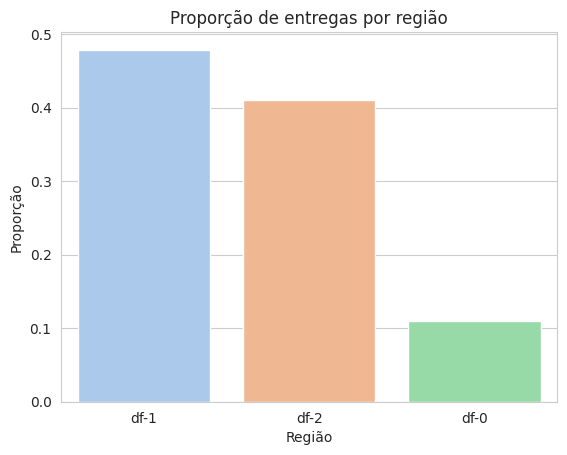

In [ ]:
# grafico de barras por região

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

In [ ]:
data_deli = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity', 'delivery_city']].value_counts(normalize=True)).reset_index()
data_deli.head(5)

,region,vehicle_capacity,delivery_city,proportion
0,df-1,180,Brasília,0.234823
1,df-2,180,Taguatinga,0.071817
2,df-1,180,Sudoeste / Octogonal,0.069691
3,df-2,180,Ceilândia,0.059821
4,df-2,180,Águas Claras,0.058449


In [ ]:
data_df0 = data_deli[data_deli["region"] == "df-0"].reset_index()
data_df0.head(25)

,index,region,vehicle_capacity,delivery_city,proportion
0,6,df-0,180,Sobradinho,0.045534
1,11,df-0,180,Planaltina,0.030097
2,19,df-0,180,Sobradinho II,0.012784
3,25,df-0,180,Itapoã,0.008765
4,26,df-0,180,Paranoá,0.007608
5,30,df-0,180,Plano Piloto,0.002494
6,32,df-0,180,Lago Norte,0.002109
7,42,df-0,180,Brazlândia,0.000084
8,43,df-0,180,Agrovila Café Sem Troco,0.000058
9,46,df-0,180,Café sem Troco,0.000019


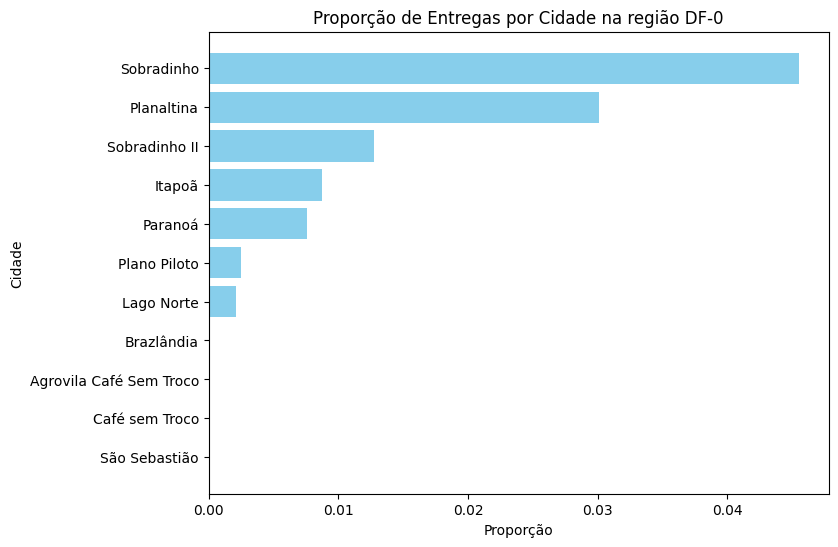

In [ ]:
data_df0_sorted = data_df0.sort_values('proportion', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(data_df0_sorted['delivery_city'], data_df0_sorted['proportion'], color='skyblue')
plt.xlabel('Proporção')
plt.ylabel('Cidade')
plt.title('Proporção de Entregas por Cidade na região DF-0')
plt.show()

In [ ]:
data_df1 = data_deli[data_deli["region"] == "df-1"].reset_index()
data_df1.head(25)

,index,region,vehicle_capacity,delivery_city,proportion
0,0,df-1,180,Brasília,0.234823
1,2,df-1,180,Sudoeste / Octogonal,0.069691
2,5,df-1,180,Lago Sul,0.045742
3,7,df-1,180,Lago Norte,0.038832
4,13,df-1,180,Jardim Botânico,0.019319
5,14,df-1,180,Guará,0.018164
6,15,df-1,180,Cruzeiro,0.017804
7,18,df-1,180,Park Way,0.013106
8,21,df-1,180,São Sebastião,0.012144
9,29,df-1,180,Candangolândia,0.004584


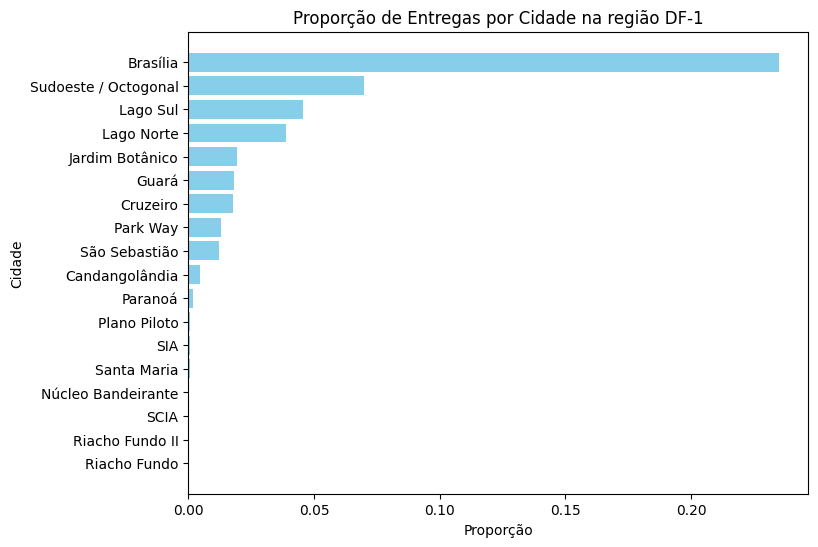

In [ ]:
data_df1_sorted = data_df1.sort_values('proportion', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(data_df1_sorted['delivery_city'], data_df1_sorted['proportion'], color='skyblue')
plt.xlabel('Proporção')
plt.ylabel('Cidade')
plt.title('Proporção de Entregas por Cidade na região DF-1')
plt.show()

In [ ]:
data_df2 = data_deli[data_deli["region"] == "df-2"].reset_index()
data_df2.head(25)

,index,region,vehicle_capacity,delivery_city,proportion
0,1,df-2,180,Taguatinga,0.071817
1,3,df-2,180,Ceilândia,0.059821
2,4,df-2,180,Águas Claras,0.058449
3,8,df-2,180,Guará,0.037604
4,9,df-2,180,Gama,0.034974
5,10,df-2,180,Samambaia,0.033227
6,12,df-2,180,Vicente Pires,0.023436
7,16,df-2,180,Santa Maria,0.017652
8,17,df-2,180,Recanto das Emas,0.015968
9,20,df-2,180,Arniqueiras,0.012330


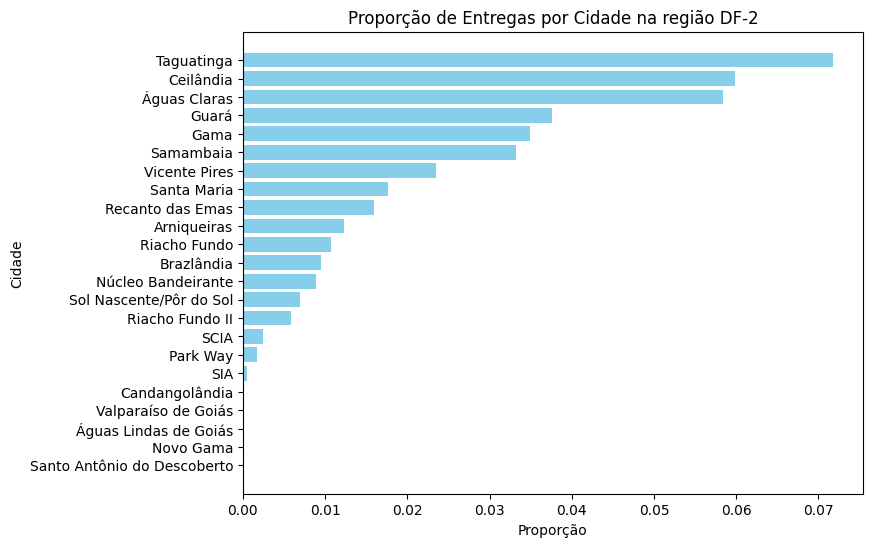

In [ ]:
data_df2_sorted = data_df2.sort_values('proportion', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(data_df2_sorted['delivery_city'], data_df2_sorted['proportion'], color='skyblue')
plt.xlabel('Proporção')
plt.ylabel('Cidade')
plt.title('Proporção de Entregas por Cidade na região DF-2')
plt.show()

**Insights**

Como podemos analisar através dos gráficos, mais de 80 porcento das entregas estão concentradas na região df-1 e df-2 e através dos gráficos por cidade podemos avaliar as cidades que mais possuem entregas para serem feitas consequentemente podemos alterar a quantidade de veículos e suas capacidades e concentrar os esforções com base nessas informações para atender da melhor forma possível os clientes.